In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
hr = pd.read_csv('HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [7]:
dum_hr = pd.get_dummies(hr, drop_first=True)
y = dum_hr['left']
X = dum_hr.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

In [19]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=24)

[Text(0.5, 0.8333333333333334, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 10496\nvalue = [7999, 2497]\nclass = 0'),
 Text(0.25, 0.5, 'number_project <= 2.5\ngini = 0.478\nsamples = 2935\nvalue = [1157, 1778]\nclass = 1'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.221\nsamples = 1204\nvalue = [152, 1052]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.487\nsamples = 1731\nvalue = [1005, 726]\nclass = 0'),
 Text(0.75, 0.5, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 7561\nvalue = [6842, 719]\nclass = 0'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.026\nsamples = 6166\nvalue = [6084, 82]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.496\nsamples = 1395\nvalue = [758.0, 637.0]\nclass = 0')]

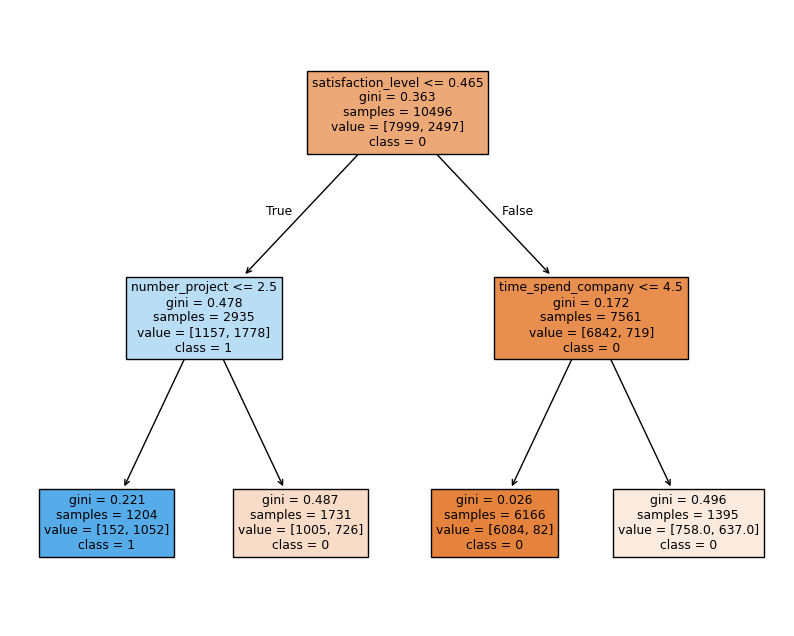

In [20]:
plt.figure(figsize=(10, 8))
plot_tree(dtc, feature_names=X_train.columns, class_names=['0','1'], filled=True)

In [35]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9762169370971326

In [31]:
X_test.iloc[0,:]

satisfaction_level         0.65
last_evaluation            0.97
number_project                3
average_montly_hours        171
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
Department_RandD          False
Department_accounting     False
Department_hr             False
Department_management     False
Department_marketing      False
Department_product_mng    False
Department_sales          False
Department_support        False
Department_technical      False
salary_low                False
salary_medium              True
Name: 6859, dtype: object

## Using GridSearch

In [40]:
params = {'max_depth': [2, 5, 7, 10, 13, None]} 

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

dtc = DecisionTreeClassifier(random_state=24)

gcv = GridSearchCV(dtc, param_grid=params, cv=kfold)
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 13}
0.97999333111037


In [15]:
X_left = X_train[X_train['satisfaction_level'] <= 0.465]
y_left = y_train[X_train['satisfaction_level'] <= 0.465]

X_right = X_train[X_train['satisfaction_level'] > 0.465]
y_right = y_train[X_train['satisfaction_level'] > 0.465]
print(X_left.shape, y_left.shape, X_right.shape, y_right.shape)

(2935, 18) (2935,) (7561, 18) (7561,)


[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 10496\nvalue = [7999, 2497]\nclass = 0'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.478\nsamples = 2935\nvalue = [1157, 1778]\nclass = 1'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.221\nsamples = 1204\nvalue = [152, 1052]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.115\nsamples = 1115\nvalue = [68, 1047]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.106\nsamples = 89\nvalue = [84, 5]\nclass = 0'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.487\nsamples = 1731\nvalue = [1005, 726]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 642\nvalue = [0, 642]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.142\nsamples = 1089\nvalue = [1005, 84]\nclass = 0'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 7561\nvalue = [6842, 719]\nclass = 0'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\

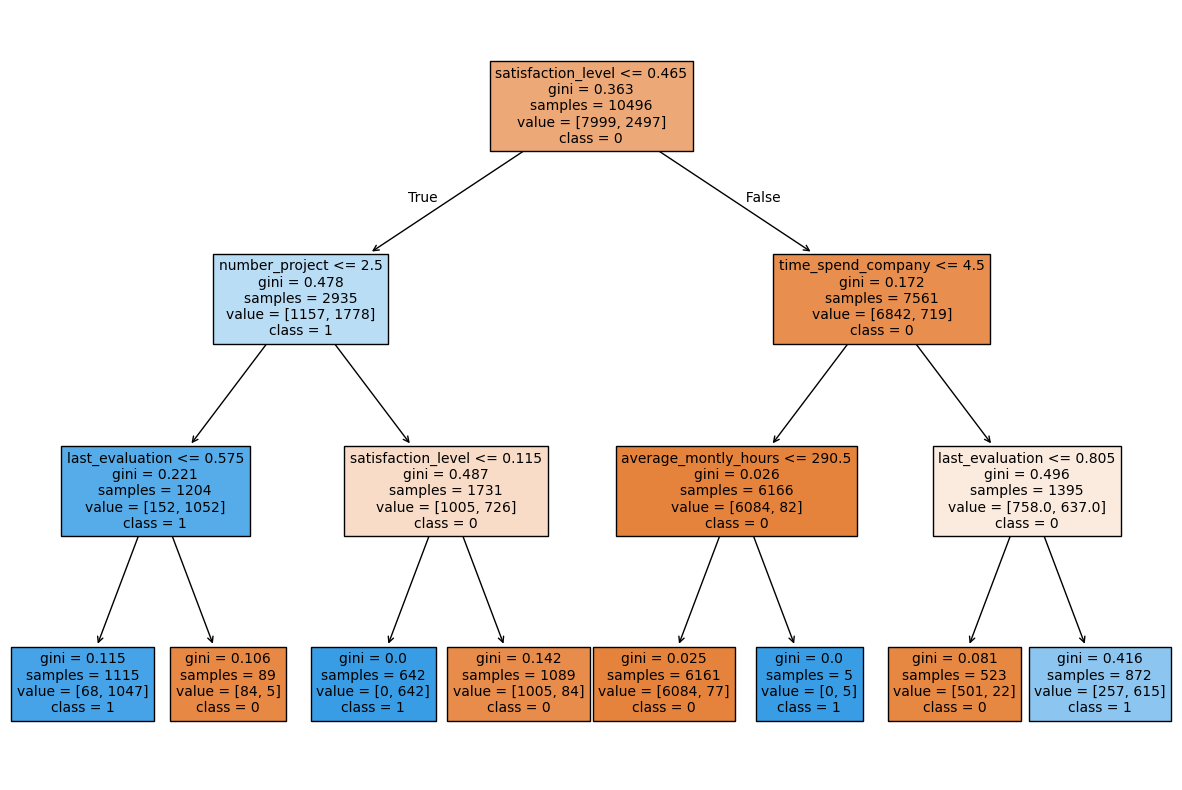

In [23]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=3)
dtc.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=['0','1'], filled=True, fontsize=10)

[Text(0.48504679259344186, 0.9782608695652174, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 10496\nvalue = [7999, 2497]\nclass = 0'),
 Text(0.18191068562256363, 0.9347826086956522, 'number_project <= 2.5\ngini = 0.478\nsamples = 2935\nvalue = [1157, 1778]\nclass = 1'),
 Text(0.33347873910800274, 0.9565217391304348, 'True  '),
 Text(0.05778491171749599, 0.8913043478260869, 'last_evaluation <= 0.575\ngini = 0.221\nsamples = 1204\nvalue = [152, 1052]\nclass = 1'),
 Text(0.02935106626920431, 0.8478260869565217, 'last_evaluation <= 0.445\ngini = 0.115\nsamples = 1115\nvalue = [68, 1047]\nclass = 1'),
 Text(0.025682182985553772, 0.8043478260869565, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = 0'),
 Text(0.03301994955285485, 0.8043478260869565, 'satisfaction_level <= 0.35\ngini = 0.064\nsamples = 1083\nvalue = [36, 1047]\nclass = 1'),
 Text(0.014675533134602155, 0.7608695652173914, 'satisfaction_level <= 0.125\ngini = 0.351\nsamples = 22\nvalue = [17, 5]\nclass = 0'),
 Text(0.

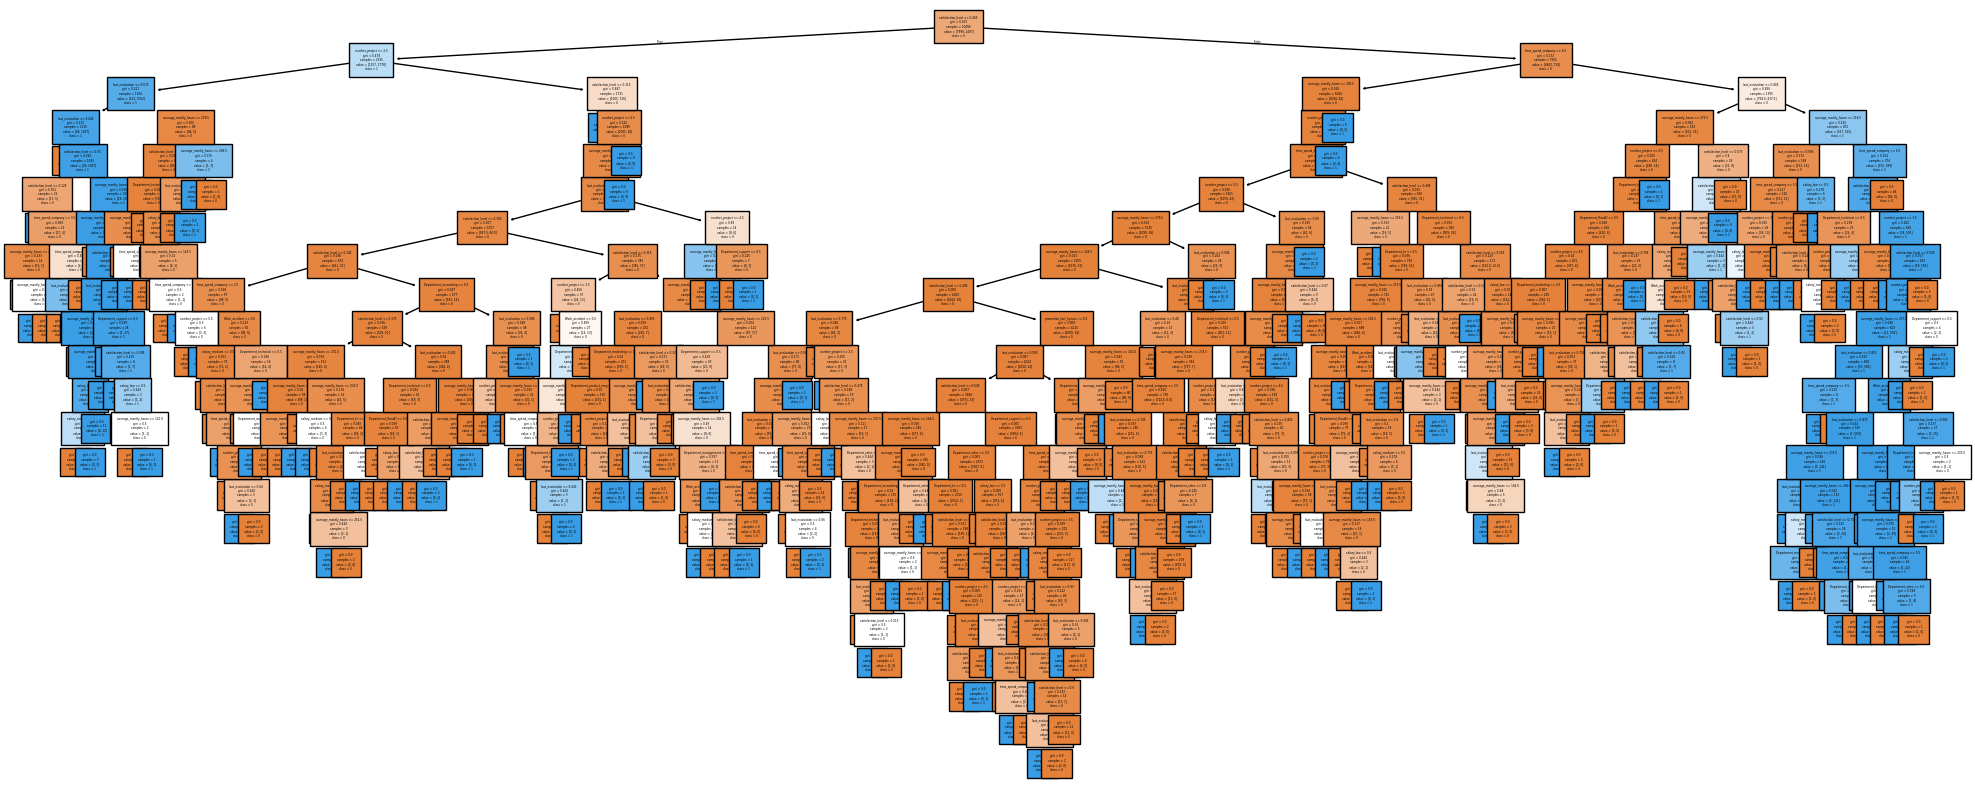

In [30]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=None)
dtc.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=['0','1'], filled=True, fontsize=2)

[Text(0.4803921568627451, 0.9285714285714286, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 10496\nvalue = [7999, 2497]\nclass = 0'),
 Text(0.2916666666666667, 0.7857142857142857, 'number_project <= 2.5\ngini = 0.478\nsamples = 2935\nvalue = [1157, 1778]\nclass = 1'),
 Text(0.3860294117647059, 0.8571428571428572, 'True  '),
 Text(0.1715686274509804, 0.6428571428571429, 'last_evaluation <= 0.575\ngini = 0.221\nsamples = 1204\nvalue = [152, 1052]\nclass = 1'),
 Text(0.058823529411764705, 0.5, 'last_evaluation <= 0.445\ngini = 0.115\nsamples = 1115\nvalue = [68, 1047]\nclass = 1'),
 Text(0.0392156862745098, 0.35714285714285715, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = 0'),
 Text(0.0784313725490196, 0.35714285714285715, 'satisfaction_level <= 0.35\ngini = 0.064\nsamples = 1083\nvalue = [36, 1047]\nclass = 1'),
 Text(0.0392156862745098, 0.21428571428571427, 'satisfaction_level <= 0.125\ngini = 0.351\nsamples = 22\nvalue = [17, 5]\nclass = 0'),
 Text(0.0196078431372549, 0.

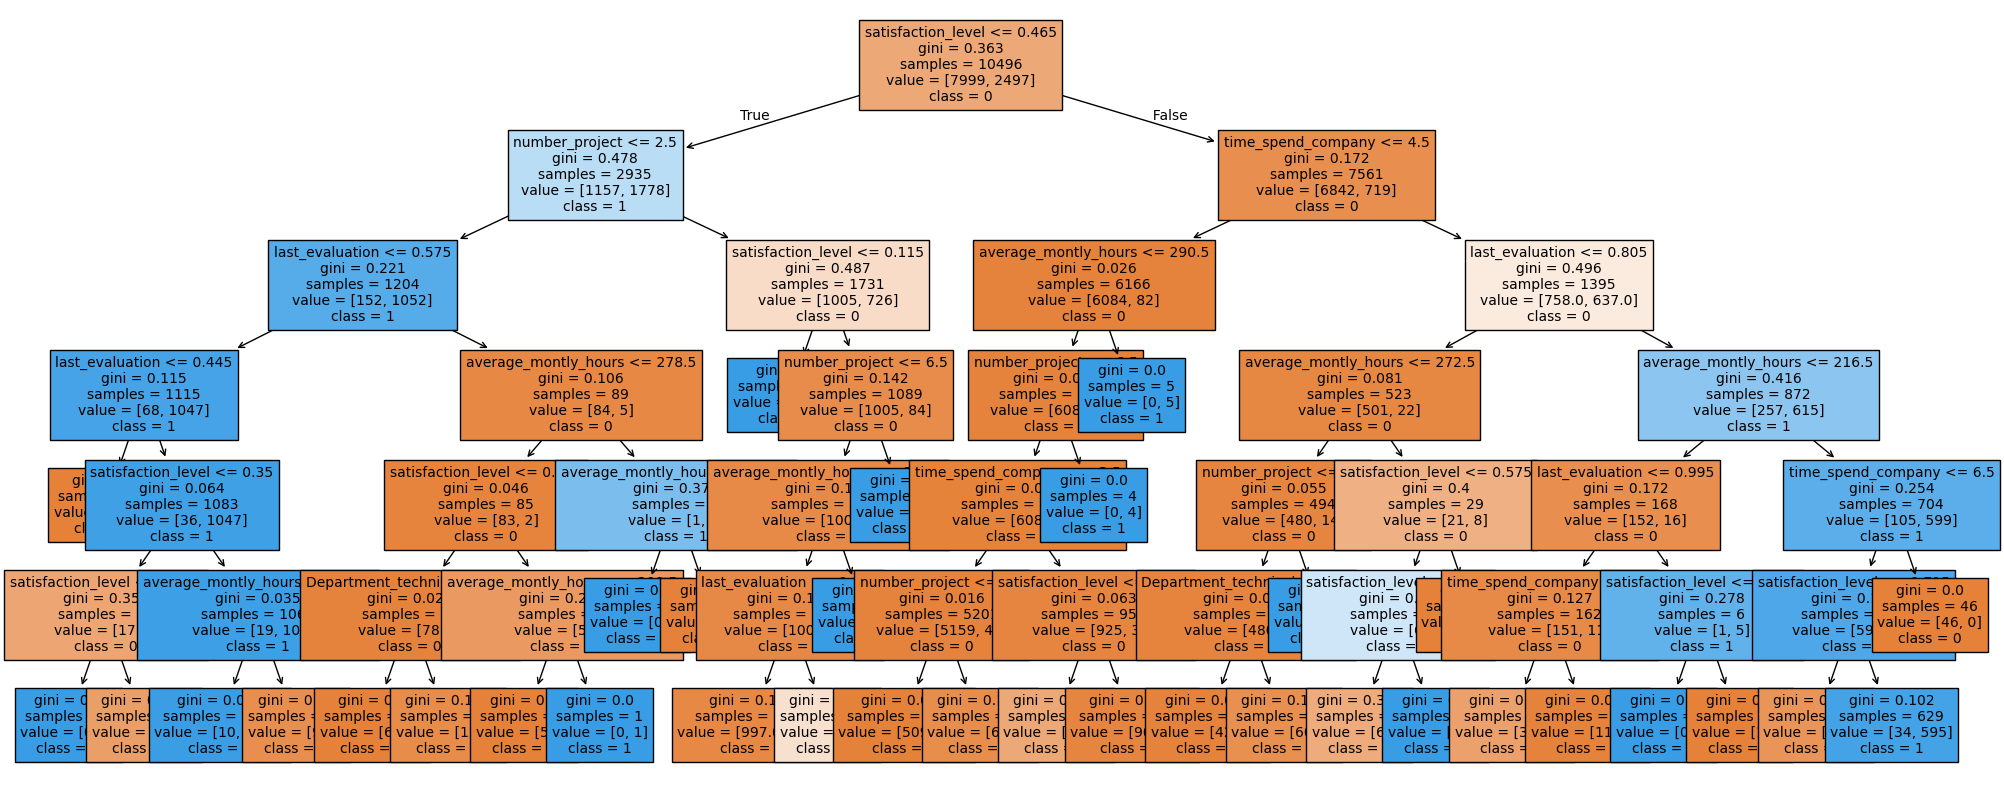

In [43]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=6)
dtc.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=['0','1'], filled=True, fontsize=10)

In [50]:
params = {'max_depth': [2, 5, 7, 10, 13, None], 'min_samples_split': [2, 5, 7, 10, 13], 'min_samples_leaf': [1, 5, 7, 10, 13]} 

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

dtc = DecisionTreeClassifier(random_state=24)

# gcv = GridSearchCV(dtc, param_grid=params, cv=kfold)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

'''
Accuracy:
{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.97999333111037

Log loss:
{'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
-0.10739790162560067
'''

{'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
-0.10739790162560067


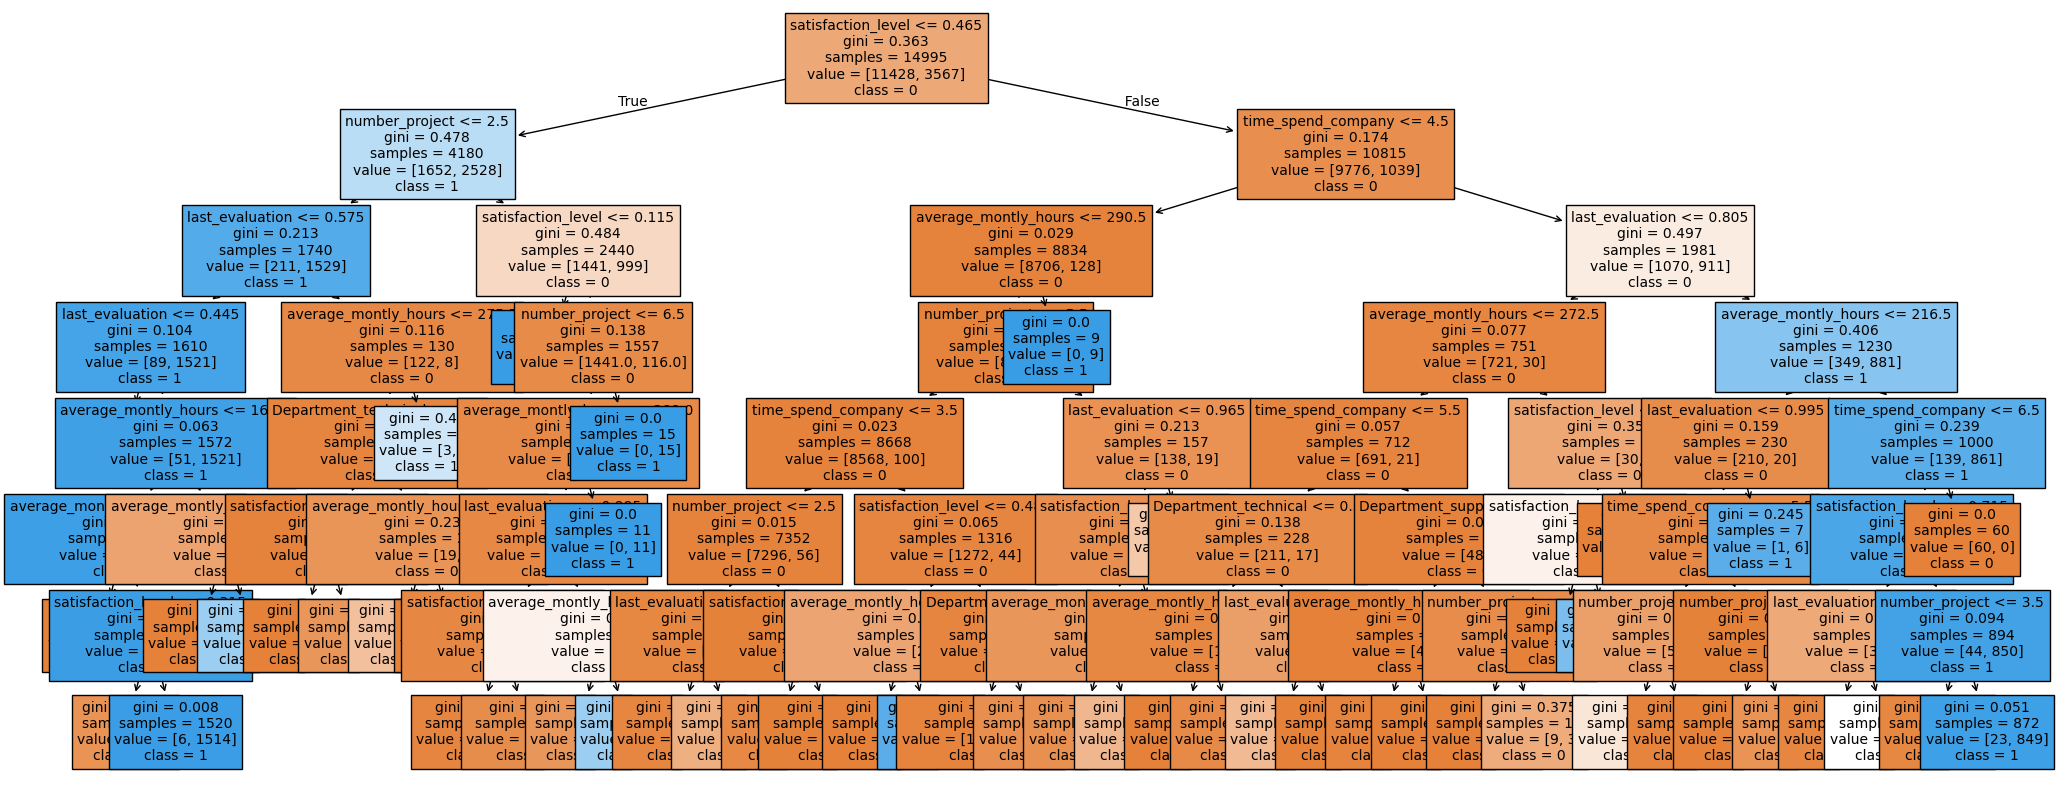

In [51]:
best_tree = gcv.best_estimator_

plt.figure(figsize=(25, 10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True, fontsize=10)
plt.show()

In [52]:
imp = best_tree.feature_importances_
imp

array([5.27459389e-01, 1.43961657e-01, 1.06020358e-01, 7.09939439e-02,
       1.50874812e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.57370325e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.62907134e-05, 4.46178918e-04,
       0.00000000e+00, 0.00000000e+00])

In [54]:
pd_imp = pd.DataFrame({'var':list(X.columns), 'imp':imp})
pd_imp.head()

,var,imp
0,satisfaction_level,0.527459
1,last_evaluation,0.143962
2,number_project,0.106020
3,average_montly_hours,0.070994
4,time_spend_company,0.150875


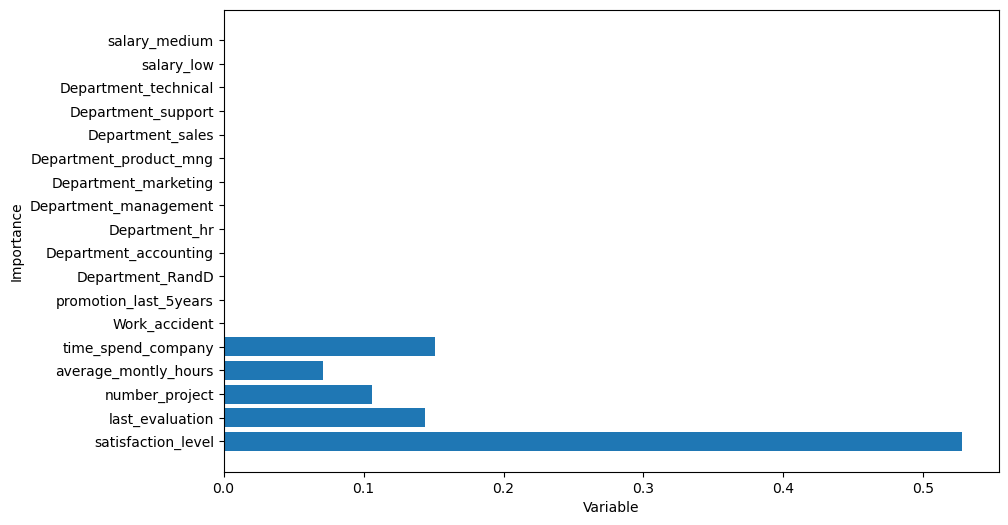

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(pd_imp['var'], pd_imp['imp'])
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.show()

In [60]:
best_model = gcv.best_estimator_

from joblib import dump
dump(best_model, 'tree_model.joblib')

['tree_model.joblib']